<a href="https://colab.research.google.com/github/magrenimish/ML_for_BME/blob/main/VISIT_LOG_ML_BME_one_hot_encoded.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Generating Visit Log dataframe with random values

In [ ]:
#generating random numeric values
import random
import numpy as np
vlog_dict = {}
vlog_keys = ['visit_location','visit_date', 'hours_spent', 'repeat_outreach', 'number_of_people', 'outreach_rating', 'comments']
vlog_dict['hours_spent'] = list(np.random.randint(low = 1,high=11,size=200))
vlog_dict['number_of_people'] = list(np.random.randint(low = 1,high=11,size=200))

In [ ]:
# list of possible repeat outreach responses to choose from
ro = ['Yes', 'No', 'Undecided']
repeat_outreach = []
for i in range(200):
  repeat_outreach.append(random.choice(ro))
vlog_dict['repeat_outreach'] = repeat_outreach

In [ ]:
# list of possible outreach rating responses to choose from
o_r = ['Satisfied', 'Dissatisfied', 'Neutral']
outreach_rating = []
for i in range(200):
  outreach_rating.append(random.choice(o_r))
vlog_dict['outreach_rating'] = outreach_rating

In [ ]:
# list of possible locations to choose from
location = ['Boston', 'New York City', 'Chicago', 'San Francisco', 'Boise']
locations=[]
for i in range(200):
    locations.append(random.choice(location))

vlog_dict['visit_location']=locations 

In [ ]:
#Filling out comments
comment = ['I felt very unsafe around them', 'Wow, the experience could not have been better', 'I had a great time', 'I will not be volunteering at that location again','the visit had positive and negative experiences']
comments=[]
for i in range(200):
    comments.append(random.choice(comment))

vlog_dict['comments']=comments 

In [ ]:
#Filling in dates

from datetime import date, timedelta
import random

# initializing dates ranges
test_date1, test_date2 = date(2022, 1, 1), date(2022, 12, 31)

# initializing K
K = 200

# getting days between dates
dates_bet = test_date2 - test_date1
total_days = dates_bet.days

res = []
for idx in range(K):
	random.seed(a=None)
	
	# getting random days
	randay = random.randrange(total_days)
	
	# getting random dates
	res.append(test_date1 + timedelta(days=randay))

vlog_dict['visit_date'] = res


In [ ]:
#Split date into month, day and year
day=[]
month=[]
year=[]
for i in range(200):
  visit_date=vlog_dict['visit_date'][i].strftime("%Y-%m-%d")
  visit_date = visit_date.split("-")
  year.append(int(visit_date[0]))
  month.append(int(visit_date[1]))
  day.append(int(visit_date[2]))
vlog_dict['day'] = day
vlog_dict['month'] = month
vlog_dict['year'] = year
del vlog_dict['visit_date']

# Sentiment Analysis

In [ ]:
#FLAIR USES IMDB RATINGS FOR TRAINING
!pip install flair

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from flair.models import TextClassifier
from flair.data import Sentence

classifier = TextClassifier.load('en-sentiment')
sentence = Sentence('I felt very unsafe around them')
classifier.predict(sentence)

# print sentence with predicted labels
print('Sentence above is: ', sentence.labels)

Sentence above is:  ['Sentence[6]: "I felt very unsafe around them"'/'NEGATIVE' (0.9999)]


In [ ]:
#creating a sentiment key in the vlog_dict dictionary and deleting the comments key [1 means positive, -1 means negative ,maybe some threshold can later be used to categorize neutral/how -ve or +ve] 
comment = ['I felt very unsafe around them', 'Wow, the experience could not have been better', 'I had a great time', 'I will not be volunteering at that location again','the visit had positive and negative experiences']

sentence = Sentence('I felt very unsafe around them')
classifier.predict(sentence)
a=sentence.labels
a=str(a[0])
# print sentence with predicted labels
print(a)
print('Sentence above is: ', a.split('→ ')[1].split(' (')[0])

Sentence[6]: "I felt very unsafe around them" → NEGATIVE (0.9999)
Sentence above is:  NEGATIVE


In [ ]:
sentiment_rating = []
for v in vlog_dict['comments']:
  sentence = Sentence(v)
  classifier.predict(sentence)
  a=sentence.labels
  a=str(a[0])
  rating =  a.split('→ ')[1].split(' (')[0]
  print(rating)
  if rating == 'POSITIVE':
    sentiment_rating.append(1)
  else:
    sentiment_rating.append(0)
vlog_dict['sentiment_rating'] = sentiment_rating
del vlog_dict['comments']

NEGATIVE
NEGATIVE
POSITIVE
NEGATIVE
NEGATIVE
POSITIVE
POSITIVE
NEGATIVE
NEGATIVE
POSITIVE
NEGATIVE
NEGATIVE
NEGATIVE
NEGATIVE
POSITIVE
POSITIVE
POSITIVE
NEGATIVE
NEGATIVE
POSITIVE
NEGATIVE
POSITIVE
NEGATIVE
NEGATIVE
POSITIVE
NEGATIVE
POSITIVE
NEGATIVE
POSITIVE
POSITIVE
POSITIVE
NEGATIVE
NEGATIVE
POSITIVE
NEGATIVE
NEGATIVE
NEGATIVE
NEGATIVE
NEGATIVE
NEGATIVE
NEGATIVE
NEGATIVE
NEGATIVE
NEGATIVE
NEGATIVE
POSITIVE
NEGATIVE
POSITIVE
POSITIVE
POSITIVE
POSITIVE
POSITIVE
NEGATIVE
POSITIVE
NEGATIVE
NEGATIVE
NEGATIVE
NEGATIVE
POSITIVE
POSITIVE
POSITIVE
NEGATIVE
NEGATIVE
POSITIVE
NEGATIVE
POSITIVE
POSITIVE
POSITIVE
POSITIVE
NEGATIVE
POSITIVE
POSITIVE
POSITIVE
NEGATIVE
NEGATIVE
NEGATIVE
POSITIVE
POSITIVE
NEGATIVE
NEGATIVE
NEGATIVE
POSITIVE
POSITIVE
NEGATIVE
NEGATIVE
NEGATIVE
NEGATIVE
NEGATIVE
POSITIVE
NEGATIVE
NEGATIVE
POSITIVE
POSITIVE
NEGATIVE
NEGATIVE
POSITIVE
POSITIVE
NEGATIVE
POSITIVE
NEGATIVE
NEGATIVE
POSITIVE
NEGATIVE
NEGATIVE
POSITIVE
POSITIVE
POSITIVE
POSITIVE
POSITIVE
POSITIVE
POSITIVE
P

In [ ]:
print(vlog_dict.keys())

dict_keys(['hours_spent', 'number_of_people', 'repeat_outreach', 'outreach_rating', 'visit_location', 'day', 'month', 'year', 'sentiment_rating'])


# Converting to data frame

In [ ]:
import pandas as pd
vlog_df = pd.DataFrame(vlog_dict)
vlog_df.tail(10)

,hours_spent,number_of_people,repeat_outreach,outreach_rating,visit_location,day,month,year,sentiment_rating
190,1,4,Undecided,Satisfied,Boise,6,12,2022,0
191,6,10,No,Dissatisfied,New York City,25,5,2022,0
192,7,3,Yes,Neutral,San Francisco,3,5,2022,0
193,3,5,Undecided,Dissatisfied,Chicago,26,12,2022,0
194,6,8,Undecided,Satisfied,San Francisco,14,3,2022,1
195,9,8,Undecided,Neutral,Boston,10,1,2022,1
196,1,5,No,Neutral,New York City,3,6,2022,0
197,6,7,Yes,Neutral,Chicago,15,1,2022,1
198,9,5,Undecided,Neutral,Chicago,7,5,2022,1
199,1,10,No,Neutral,San Francisco,20,1,2022,1


In [ ]:
vlog_df.describe(include='object')

,repeat_outreach,outreach_rating,visit_location
count,200,200,200
unique,3,3,5
top,Yes,Satisfied,San Francisco
freq,69,71,50


# Binary Classification to determine sentiment rating

In [ ]:
vlog_df['sentiment_rating'].value_counts()

0    106
1     94
Name: sentiment_rating, dtype: int64

In [ ]:
#mapping month numeric to month alphabetic values
monthmap = {
    1:'Jan',
    2:'Feb',
    3:'Mar',
    4:'Apr',
    5:'May',
    6:'Jun',
    7:'Jul',
    8:'Aug',
    9:'Sep',
    10:'Oct',
    11:'Nov',
    12:'Dec',
}


In [ ]:
vlog_df['month'] = vlog_df['month'].apply(lambda x: monthmap[x])

In [ ]:
vlog_df.head()

,hours_spent,number_of_people,repeat_outreach,outreach_rating,visit_location,day,month,year,sentiment_rating
0,7,4,Undecided,Dissatisfied,Boise,16,Jul,2022,0
1,5,10,No,Satisfied,New York City,22,Apr,2022,0
2,1,10,Yes,Satisfied,Boston,11,Nov,2022,1
3,2,5,No,Neutral,San Francisco,13,Jan,2022,0
4,6,7,Yes,Satisfied,San Francisco,25,Sep,2022,0


In [ ]:
vlog_df.columns

Index(['hours_spent', 'number_of_people', 'repeat_outreach', 'outreach_rating',
       'visit_location', 'day', 'month', 'year', 'sentiment_rating'],
      dtype='object')

In [ ]:
vlog_df = vlog_df.drop(['repeat_outreach', 'outreach_rating'],axis=1)

#Upload CSV

In [ ]:
import pandas as pd
vlog_df = pd.read_csv('final_VISIT_LOG_with_String_and_Numerics.csv')
vlog_df.head(5)

,hours_spent,number_of_people,repeat_outreach,outreach_rating,visit_location,year,season,day_type,sentiment_rating,negative_confidence,positive_confidence,city_location,numeric_daytype,numeric_season,repeat_outreach_numeric,outreach_rating_numeric
0,12,3,yes,satisfied,Chicago,2022,Summer,weekday,0,1.00,0.00,3,1,2,1,1
1,12,9,yes,unsatisfied,Chicago,2022,Spring,weekday,1,0.00,0.99,3,1,1,1,3
2,2,10,no,satisfied,Boston,2022,Fall,weekday,1,0.00,0.99,1,1,3,2,1
3,8,9,yes,unsatisfied,Boston,2022,Summer,weekday,1,0.00,0.94,1,1,2,1,3
4,12,9,no,satisfied,New York City,2022,Spring,weekday,0,0.54,0.00,2,1,1,2,1


# Experiment 1: make a new column with -confidence score if sentiment_rating = negative and vice versa. use regression to predict these values

In [ ]:
vlog_df['sentiment_with_confidence'] = vlog_df['positive_confidence'] - vlog_df['negative_confidence']

In [ ]:
#storing vlog_df in temp_df so it can be manipulated for experiment 1 without affecting original
temp1_vlog_df = vlog_df

In [ ]:
temp1_vlog_df['season'].unique()

array(['Summer', 'Spring', 'Fall', 'Winter'], dtype=object)

In [ ]:
temp1_vlog_df = temp1_vlog_df.drop(['repeat_outreach','outreach_rating','year', 'sentiment_rating', 'negative_confidence', 'positive_confidence', 'city_location','day_type', 'numeric_season', 'repeat_outreach_numeric', 'outreach_rating_numeric'],axis=1)
temp1_vlog_df.head()

,hours_spent,number_of_people,visit_location,season,numeric_daytype,sentiment_with_confidence
0,12,3,Chicago,Summer,1,-1.00
1,12,9,Chicago,Spring,1,0.99
2,2,10,Boston,Fall,1,0.99
3,8,9,Boston,Summer,1,0.94
4,12,9,New York City,Spring,1,-0.54


In [ ]:
temp1_vlog_df.tail()

,hours_spent,number_of_people,visit_location,season,numeric_daytype,sentiment_with_confidence
1995,12,10,New York City,Spring,2,-1.00
1996,3,8,Chicago,Fall,1,-0.54
1997,5,1,Chicago,Winter,2,-0.54
1998,10,2,New York City,Summer,1,-1.00
1999,9,8,San Francisco,Winter,2,-1.00


In [ ]:
temp1_vlog_df = pd.get_dummies(temp1_vlog_df)
temp1_vlog_df.head()

,hours_spent,number_of_people,numeric_daytype,sentiment_with_confidence,visit_location_Boise,visit_location_Boston,visit_location_Chicago,visit_location_New York City,visit_location_San Francisco,season_Fall,season_Spring,season_Summer,season_Winter
0,12,3,1,-1.00,0,0,1,0,0,0,0,1,0
1,12,9,1,0.99,0,0,1,0,0,0,1,0,0
2,2,10,1,0.99,0,1,0,0,0,1,0,0,0
3,8,9,1,0.94,0,1,0,0,0,0,0,1,0
4,12,9,1,-0.54,0,0,0,1,0,0,1,0,0


In [ ]:
temp1_vlog_df.dtypes

hours_spent                       int64
number_of_people                  int64
numeric_daytype                   int64
sentiment_with_confidence       float64
visit_location_Boise              uint8
visit_location_Boston             uint8
visit_location_Chicago            uint8
visit_location_New York City      uint8
visit_location_San Francisco      uint8
season_Fall                       uint8
season_Spring                     uint8
season_Summer                     uint8
season_Winter                     uint8
dtype: object

In [ ]:
X = temp1_vlog_df.drop('sentiment_with_confidence', axis=1)
y = temp1_vlog_df['sentiment_with_confidence']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1234)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1400, 12) (600, 12) (1400,) (600,)


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [ ]:
pipelines = {
    'rf':make_pipeline(RandomForestRegressor(random_state=1234)),
    'gb':make_pipeline(GradientBoostingRegressor(random_state=1234)),
    'ridge':make_pipeline(Ridge(random_state=1234)),
    'lasso':make_pipeline(Lasso(random_state=1234)),
    'enet':make_pipeline(ElasticNet(random_state=1234)),
}

In [ ]:
hypergrid = {
    'rf': {
        'randomforestregressor__min_samples_split':[2,4,6],
        'randomforestregressor__min_samples_leaf':[1,2,3]
    },
    'gb':{
        'gradientboostingregressor__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    },
    'ridge':{
        'ridge__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    },
    'lasso':{
        'lasso__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    },
    'enet':{
        'elasticnet__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    }
}

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import NotFittedError

In [ ]:
fit_models = {}
for algo, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hypergrid[algo], cv=10, n_jobs=-1)
    try:
        print('Starting training for {}.'.format(algo))
        model.fit(X_train, y_train)
        fit_models[algo] = model
        print('{} has been successfully fit.'.format(algo))
    except NotFittedError as e:
        print(repr(e))

Starting training for rf.
rf has been successfully fit.
Starting training for gb.
gb has been successfully fit.
Starting training for ridge.
ridge has been successfully fit.
Starting training for lasso.
lasso has been successfully fit.
Starting training for enet.
enet has been successfully fit.


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error

In [ ]:
for algo,model in fit_models.items():
    yhat = model.predict(X_test)
    print('{} scores - R2:{} MAE:{}'.format(algo, r2_score(y_test, yhat), mean_absolute_error(y_test, yhat)))

rf scores - R2:-0.05999745783853205 MAE:0.855256385918711
gb scores - R2:-0.024457023977158654 MAE:0.8606212482404013
ridge scores - R2:-0.014602502054235522 MAE:0.868211989325567
lasso scores - R2:-0.006582007471341411 MAE:0.8668554223141582
enet scores - R2:-0.007203515589158327 MAE:0.8667478581388586


In [ ]:
best_model = fit_models['rf']

In [ ]:
temp1_vlog_df.dtypes

hours_spent                       int64
number_of_people                  int64
numeric_daytype                   int64
sentiment_with_confidence       float64
visit_location_Boise              uint8
visit_location_Boston             uint8
visit_location_Chicago            uint8
visit_location_New York City      uint8
visit_location_San Francisco      uint8
season_Fall                       uint8
season_Spring                     uint8
season_Summer                     uint8
season_Winter                     uint8
dtype: object

In [ ]:
trial = {'hours_spent':5,	
         'number_of_people':4,	
         'numeric_daytype':1, 
         'visit_location_Boise':0,	
         'visit_location_Boston':1,	
         'visit_location_Chicago':0,	
         'visit_location_New York City':0,	
         'visit_location_San Francisco':0,	
         'season_Fall':0, 
         'season_Spring':1, 
         'season_Summer':0,	
         'season_Winter':0}
trial_test = pd.DataFrame(trial,index=[0])

In [ ]:
#interpreting best fit model
answer = best_model.predict(trial_test)
if answer[0]<1:
  print('the experience will be negative with a confidence of {}'.format(round(abs(answer[0]),2)))
else:
  print('the experience will be positive with a confidence of {}'.format(round(abs(answer[0]),2)))

the experience will be negative with a confidence of 0.01


# Repeat Outreach Prediction Binary Classification

In [ ]:
vlog_df['repeat_outreach_numeric'].unique()

array([1, 2])

In [ ]:
vlog_df['repeat_outreach_numeric']=vlog_df['repeat_outreach_numeric'].replace(3,2)

In [ ]:
list(vlog_df.columns)

['hours_spent',
 'number_of_people',
 'repeat_outreach',
 'outreach_rating',
 'visit_location',
 'year',
 'season',
 'day_type',
 'sentiment_rating',
 'negative_confidence',
 'positive_confidence',
 'city_location',
 'numeric_daytype',
 'numeric_season',
 'repeat_outreach_numeric',
 'outreach_rating_numeric']

In [ ]:
X = vlog_df.drop(['repeat_outreach',
 'numeric_season',
 'numeric_daytype',
 'city_location',
 'sentiment_rating',
 'negative_confidence',
 'positive_confidence',
 'outreach_rating_numeric',
 'repeat_outreach_numeric'], axis=1)
X=pd.get_dummies(X)
y = vlog_df['repeat_outreach_numeric']

In [ ]:
X.columns

Index(['hours_spent', 'number_of_people', 'year', 'outreach_rating_neutral',
       'outreach_rating_satisfied', 'outreach_rating_unsatisfied',
       'visit_location_Boise', 'visit_location_Boston',
       'visit_location_Chicago', 'visit_location_New York City',
       'visit_location_San Francisco', 'season_Fall', 'season_Spring',
       'season_Summer', 'season_Winter', 'day_type_weekday',
       'day_type_weekend'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.25, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler

ss_train = StandardScaler()
X_train = ss_train.fit_transform(X_train)

ss_test = StandardScaler()
X_test = ss_test.fit_transform(X_test)

In [ ]:
models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines'] = LinearSVC()

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy, precision, recall = {}, {}, {}

for key in models.keys():
    
    # Fit the classifier
    models[key].fit(X_train, y_train)
    
    # Make predictions
    predictions = models[key].predict(X_test)
    
    # Calculate metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import pandas as pd

df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

,Accuracy,Precision,Recall
Logistic Regression,0.634,0.000000,0.000000
Support Vector Machines,0.634,0.000000,0.000000
Decision Trees,0.528,0.349727,0.353591
Random Forest,0.558,0.213115,0.336207
Naive Bayes,0.622,0.021858,0.285714
K-Nearest Neighbor,0.578,0.196721,0.360000


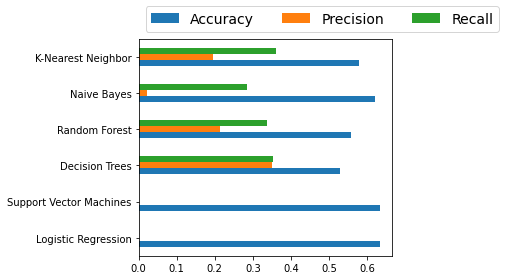

In [ ]:
import matplotlib.pyplot as plt
ax = df_model.plot.barh()
ax.legend(
    ncol=len(models.keys()), 
    bbox_to_anchor=(0, 1), 
    loc='lower left', 
    prop={'size': 14}
)
plt.tight_layout()

In [ ]:
features = list(X.columns)
print(features)

['hours_spent', 'number_of_people', 'year', 'outreach_rating_neutral', 'outreach_rating_satisfied', 'outreach_rating_unsatisfied', 'visit_location_Boise', 'visit_location_Boston', 'visit_location_Chicago', 'visit_location_New York City', 'visit_location_San Francisco', 'season_Fall', 'season_Spring', 'season_Summer', 'season_Winter', 'day_type_weekday', 'day_type_weekend']


In [ ]:
feature_df = pd.DataFrame({'Importance':models['Random Forest'].feature_importances_, 'Features': features })
print(feature_df)

    Importance                      Features
0     0.322872                   hours_spent
1     0.309664              number_of_people
2     0.000000                          year
3     0.026155       outreach_rating_neutral
4     0.026491     outreach_rating_satisfied
5     0.028055   outreach_rating_unsatisfied
6     0.025648          visit_location_Boise
7     0.027370         visit_location_Boston
8     0.026713        visit_location_Chicago
9     0.027078  visit_location_New York City
10    0.023775  visit_location_San Francisco
11    0.024961                   season_Fall
12    0.025118                 season_Spring
13    0.027454                 season_Summer
14    0.025539                 season_Winter
15    0.027055              day_type_weekday
16    0.026052              day_type_weekend


# SHAP analysis

In [ ]:
!pip install shap==0.39

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 KB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for shap: filename=shap-0.39.0-cp39-cp39-linux_x86_64.whl size=534859 sha256=a863380e71b4c0810cf60565372c4cd55fb1c3c1b810a83e1a740c4b9633b528
  Stored in directory: /root/.cache/pip/wheels/bb/91/16/f6a057925f93af7e4281f6afce3495b595b473342766eb451c
Successfully built shap


In [ ]:
import shap # v0.39.0
shap.initjs()
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='rainbow')

In [ ]:
features = list(trial.keys())
features

['hours_spent',
 'number_of_people',
 'numeric_daytype',
 'visit_location_Boise',
 'visit_location_Boston',
 'visit_location_Chicago',
 'visit_location_New York City',
 'visit_location_San Francisco',
 'season_Fall',
 'season_Spring',
 'season_Summer',
 'season_Winter']

In [ ]:
explainer = shap.Explainer(models["Random Forest"], feature_names = features)
shap_test = explainer(X_test)
print(f"Shap values length: {len(shap_test)}\n")
print(f"Sample shap value:\n{shap_test[0]}")

Shap values length: 500

Sample shap value:
.values =
array([[-0.01979164,  0.01979164],
       [-0.01412117,  0.01412117],
       [ 0.        ,  0.        ],
       [-0.00377265,  0.00377265],
       [-0.0140349 ,  0.0140349 ],
       [-0.00034829,  0.00034829],
       [ 0.00102481, -0.00102481],
       [-0.00976066,  0.00976066],
       [-0.01676521,  0.01676521],
       [-0.00326208,  0.00326208],
       [-0.01189849,  0.01189849],
       [-0.02175996,  0.02175996],
       [ 0.00814591, -0.00814591],
       [-0.01239515,  0.01239515],
       [-0.00242221,  0.00242221],
       [-0.00564575,  0.00564575],
       [-0.0094259 ,  0.0094259 ]])

.base_values =
array([0.34456667, 0.65543333])

.data =
array([ 0.13787325, -0.5820158 ,  0.        , -0.756523  ,  1.36277029,
       -0.63289827, -0.47801802,  1.97533814, -0.52489066, -0.44935852,
       -0.54036068,  1.75072575, -0.58350885, -0.57427105, -0.58042949,
        0.59583014, -0.59583014])


In [ ]:
pd.DataFrame(shap_test.data, columns=features)

,hours_spent,number_of_people,day,year,repeat_outreach_No,repeat_outreach_Undecided,repeat_outreach_Yes,outreach_rating_Dissatisfied,outreach_rating_Neutral,outreach_rating_Satisfied,...,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep
0,0.926595,-0.740890,-0.111068,0.0,1.277333,-0.654654,-0.685994,1.277333,-0.685994,-0.654654,...,-0.204124,3.958114,-0.369274,-0.333333,-0.204124,-0.252646,-0.369274,-0.252646,-0.369274,-0.333333
1,-0.203399,0.404816,-0.645046,0.0,-0.782881,1.527525,-0.685994,1.277333,-0.685994,-0.654654,...,-0.204124,-0.252646,-0.369274,-0.333333,-0.204124,-0.252646,-0.369274,-0.252646,2.708013,-0.333333
2,0.926595,1.550522,-1.179024,0.0,1.277333,-0.654654,-0.685994,-0.782881,-0.685994,1.527525,...,4.898979,-0.252646,-0.369274,-0.333333,-0.204124,-0.252646,-0.369274,-0.252646,-0.369274,-0.333333
3,-0.203399,-0.740890,0.743298,0.0,1.277333,-0.654654,-0.685994,-0.782881,1.457738,-0.654654,...,-0.204124,-0.252646,-0.369274,-0.333333,-0.204124,-0.252646,-0.369274,3.958114,-0.369274,-0.333333
4,0.549930,-0.358988,-0.965433,0.0,1.277333,-0.654654,-0.685994,1.277333,-0.685994,-0.654654,...,-0.204124,-0.252646,2.708013,-0.333333,-0.204124,-0.252646,-0.369274,-0.252646,-0.369274,-0.333333
5,0.173266,-0.358988,-1.392616,0.0,-0.782881,-0.654654,1.457738,-0.782881,-0.685994,1.527525,...,-0.204124,-0.252646,2.708013,-0.333333,-0.204124,-0.252646,-0.369274,-0.252646,-0.369274,-0.333333
6,-0.203399,-0.740890,-1.072229,0.0,-0.782881,-0.654654,1.457738,-0.782881,1.457738,-0.654654,...,-0.204124,-0.252646,-0.369274,-0.333333,-0.204124,-0.252646,2.708013,-0.252646,-0.369274,-0.333333
7,-0.956728,-0.358988,0.850094,0.0,-0.782881,-0.654654,1.457738,-0.782881,1.457738,-0.654654,...,-0.204124,-0.252646,2.708013,-0.333333,-0.204124,-0.252646,-0.369274,-0.252646,-0.369274,-0.333333
8,-0.956728,-0.358988,-0.751842,0.0,1.277333,-0.654654,-0.685994,1.277333,-0.685994,-0.654654,...,-0.204124,-0.252646,-0.369274,-0.333333,4.898979,-0.252646,-0.369274,-0.252646,-0.369274,-0.333333
9,0.549930,-1.122792,0.743298,0.0,-0.782881,-0.654654,1.457738,-0.782881,1.457738,-0.654654,...,4.898979,-0.252646,-0.369274,-0.333333,-0.204124,-0.252646,-0.369274,-0.252646,-0.369274,-0.333333


In [ ]:
shap_df = pd.DataFrame(shap_test.values[:,:,0], 
                       columns=features)
shap_df

,hours_spent,number_of_people,day,year,repeat_outreach_No,repeat_outreach_Undecided,repeat_outreach_Yes,outreach_rating_Dissatisfied,outreach_rating_Neutral,outreach_rating_Satisfied,...,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep
0,-0.013519,0.012652,0.038413,0.0,-0.039743,-0.014535,-0.005496,0.009513,0.007843,-0.002455,...,-0.007368,0.071788,0.007993,-0.004394,0.000578,-0.002055,0.013860,0.006686,-0.001335,0.004601
1,0.024520,0.025720,-0.001659,0.0,-0.002746,0.000695,0.000873,0.031045,0.015966,0.007955,...,-0.002102,-0.011305,0.026285,-0.004331,0.003650,-0.001777,0.011355,0.007256,-0.003354,-0.006637
2,0.033905,-0.003309,0.045478,0.0,0.021854,0.002439,0.016496,-0.005699,0.008750,0.007427,...,0.020679,-0.007626,0.009951,0.000757,0.009757,-0.006167,0.005378,-0.002128,-0.000318,0.003217
3,-0.006741,-0.007715,-0.056096,0.0,-0.058268,-0.023092,-0.017302,-0.014956,-0.011739,0.000479,...,-0.001930,-0.008996,0.000547,-0.002818,-0.003655,-0.004006,0.005091,-0.057659,-0.001291,-0.000884
4,0.040923,0.052352,0.060655,0.0,-0.020828,-0.005708,-0.001326,0.011107,0.008062,-0.000575,...,-0.009248,-0.015480,-0.061529,-0.004428,0.001587,-0.004745,0.012426,0.009256,-0.000615,0.004049
5,-0.012156,0.026522,0.031960,0.0,-0.005191,-0.004434,-0.027228,-0.023311,0.000212,-0.026049,...,-0.000407,-0.014659,-0.099008,-0.001651,-0.000031,-0.006268,0.009197,0.003669,-0.000584,-0.001798
6,-0.028233,-0.008046,0.013948,0.0,0.008971,-0.006114,0.011826,-0.041892,-0.033830,0.016774,...,-0.002011,-0.009449,0.011957,-0.003547,-0.003106,-0.007491,-0.087297,0.003604,0.000064,-0.002258
7,-0.007354,0.042171,-0.018990,0.0,0.021439,-0.014816,-0.003740,-0.012708,0.022582,0.025777,...,-0.004983,-0.007822,-0.079446,-0.003727,0.003011,-0.007297,0.003525,0.006022,-0.000074,-0.001439
8,0.044901,0.041774,0.074869,0.0,-0.028768,-0.010843,-0.002160,0.018136,0.013567,0.004771,...,-0.009483,-0.017211,0.012574,-0.003511,-0.037945,-0.004501,0.017545,0.010283,0.000724,0.005565
9,0.042693,-0.039866,0.006637,0.0,0.024191,-0.006038,0.012179,-0.030088,-0.031412,0.012300,...,0.011655,-0.007420,0.008752,-0.006661,-0.004865,-0.003674,0.014611,0.002779,-0.000758,0.002323


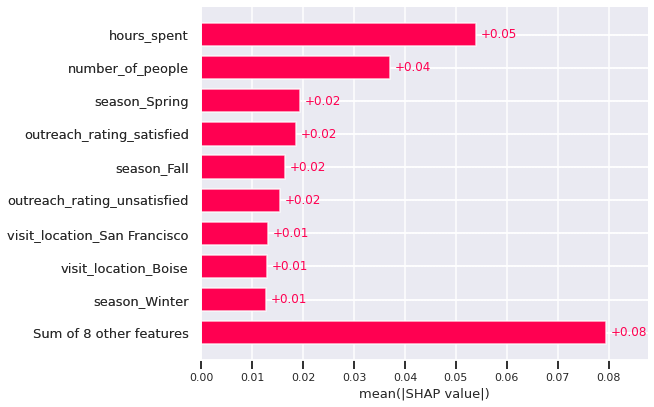

In [ ]:
shap.plots.bar(shap_test[:,:,0])

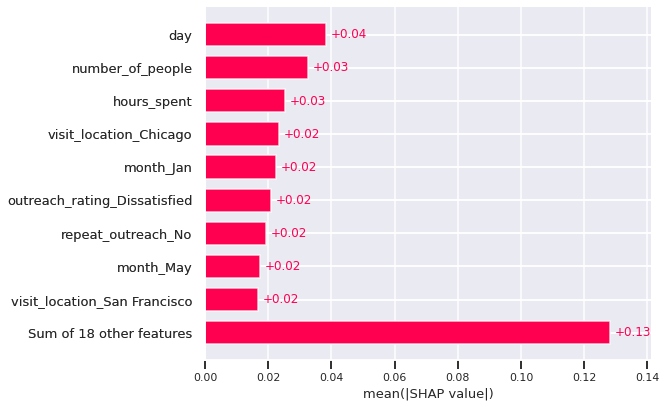

In [ ]:
shap.plots.bar(shap_test[:,:,1])